# Demand function modeling

Cable demand in the US

In [1]:
# loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

# packages for statistical analysis 
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as stats

from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import reset_ramsey

In [2]:
def myTSplot(x, label=None):
    dfCable[x].plot()
    plt.title('Plot of '+ label)
    plt.xticks(range(15), dfCable['year'], rotation='vertical')
    plt.grid()
    plt.show()


## 1. Getting and describing the data

### 1.1. Import the data

In [3]:
# read the data from MS Excel file
dfCable = pd.read_excel('cable.xlsx', 'data', index_col=None, na_values=['NA'])

In [4]:
# look at the head of the data frame
dfCable.head(n=5)

,year,Q,Inc,Hs,Un,R
0,1968,5873,1051.8,1503.6,3.6,5.8
1,1969,7852,1078.8,1486.7,3.5,6.7
2,1970,8189,1075.3,1434.8,5.0,8.4
3,1971,7497,1107.5,2035.6,6.0,6.2
4,1972,8534,1171.1,2360.8,5.6,5.4


### 1.2. Descriptive analysis

In [5]:
# calculate basic descriptive statistics
dfCable.describe().round(2)

,year,Q,Inc,Hs,Un,R
count,15.00,15.0,15.00,15.00,15.00,15.00
mean,1975.00,7517.8,1270.49,1601.49,6.23,9.21
std,4.47,1255.5,161.48,401.24,1.65,4.00
min,1968.00,5020.0,1051.80,1039.00,3.50,5.40
25%,1971.50,6905.0,1139.30,1314.95,5.30,6.40
50%,1975.00,7497.0,1235.00,1503.60,6.00,7.60
75%,1978.50,8361.5,1415.40,1985.55,7.40,10.00
max,1982.00,9400.0,1510.30,2360.80,9.20,17.50


### 1.3. Graphical analysis: individual time-series graphs

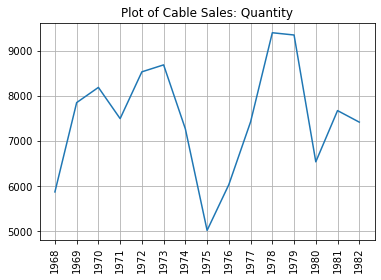

In [6]:
# Plot of Cable Sales
myTSplot('Q', 'Cable Sales: Quantity')

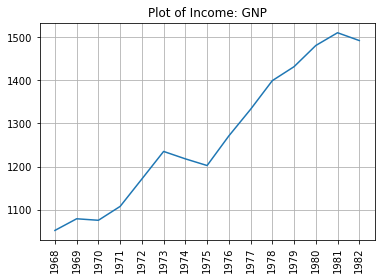

In [7]:
# Plot of Income
myTSplot('Inc', 'Income: GNP')

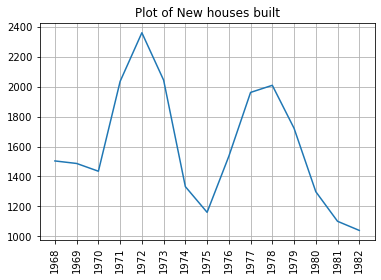

In [8]:
# Plot of Housing starts
myTSplot('Hs', 'New houses built')

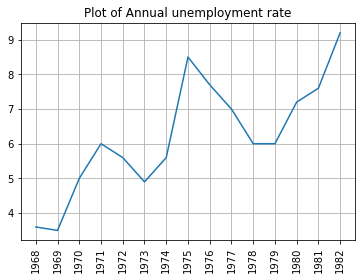

In [9]:
# Plot of Unemployment
myTSplot('Un', 'Annual unemployment rate')

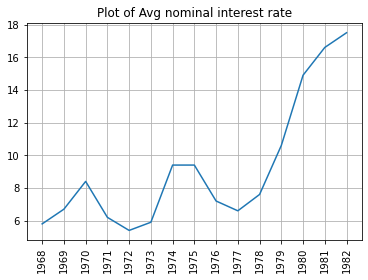

In [11]:
# Plot of INTEREST RATE
myTSplot('R', 'Avg nominal interest rate')

## 2. Running a simple pair-wise analysis

In [12]:
# extract Qc and Pc
Inc = dfCable['Inc']
Q = dfCable['Q']

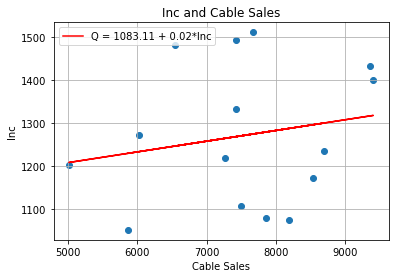

In [13]:
# scatter plot
plt.scatter(Q, Inc)
plt.xlabel("Cable Sales")
plt.ylabel("Inc")
plt.title("Inc and Cable Sales")
plt.grid()

#regression part
slopeY, interceptY, _, _, _ = scipy.stats.linregress(Q,Inc)
lineY = slopeY*Q+interceptY
plt.plot(Q, lineY, 'r', label='Q = {:.2f} + {:.2f}*Inc'.format(interceptY, slopeY))
#end

plt.legend()
plt.show()

In [14]:
# run a pair-wise correlation analysis
coefPears, pvPears= scipy.stats.pearsonr(Q, Inc)

print("Pearson's correlation = ", round(coefPears,3))
print("Pearson's p-value = ", round(pvPears,3))

Pearson's correlation =  0.194
Pearson's p-value =  0.489


## 3. Linear regression analysis

### 3.1. MODEL 1: Multivariate linear regression

In [15]:
# estimate Model 1
model1 = ols('Q ~ Inc + Hs + Un', dfCable).fit()
model1.summary()

/home/ina/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     5.863
Date:                Wed, 16 Nov 2022   Prob (F-statistic):             0.0121
Time:                        17:37:49   Log-Likelihood:                -120.63
No. Observations:                  15   AIC:                             249.3
Df Residuals:                      11   BIC:                             252.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    511.6624   2403.931      0.213      0.835   -4779.354    5802.679
Inc            5.9538      1.983      3.002      0.012       1.589      10.318
Hs             1.5362      0.642      2.392      0.036       0.123       2.950
Un          -484.7288    204.183     -2.374      0.037    -934.133     -35.324
==============================================================================
Omnibus:                        0.470   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.170
Skew:                          -0.244   Prob(JB):                        0.918
Kurtosis:                       2.815   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.2. Tests of disturbances of Model 1

In [16]:
# store model residuals
resids1 = model1.resid

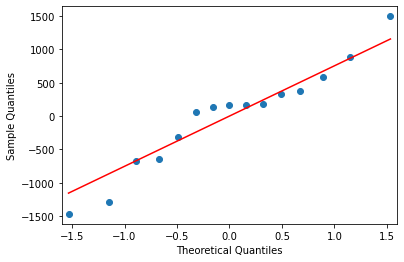

In [17]:
# Visual Normality Test
qqplot(resids1, line='s');

# Jarque-Bera test results are in the summary of Model 1

In [18]:
# The Breusch-Pagan heteroskedasticity test
BPtest = pd.DataFrame(stats.diagnostic.het_breuschpagan(resids1, model1.model.exog), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Pagan test ---')
print(BPtest)


 --- The Breusch-Pagan test ---
                         value
chi^2 test statistic  3.375225
chi^2 test p-value    0.337309
F-test statistic      1.064608
F-test p-value        0.403464


/tmp/ipykernel_25652/3044861512.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


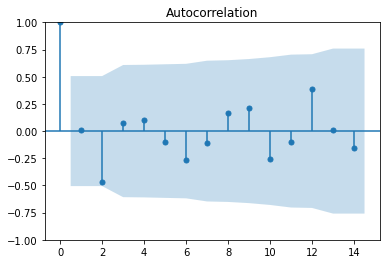

In [19]:
# Graphical Autocorrelation Test
acf = smt.graphics.plot_acf(resids1, lags=14, alpha=0.05)
acf.show()

In [20]:
# The Breusch-Godfrey autocorrelation test
BGtest = pd.DataFrame(stats.diagnostic.acorr_breusch_godfrey(model1, nlags=1), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Godfrey test ---')
print(BGtest)


 --- The Breusch-Godfrey test ---
                         value
chi^2 test statistic  0.000879
chi^2 test p-value    0.976346
F-test statistic      0.000586
F-test p-value        0.981161


### 3.3. Tests of the specification of Model 1

In [ ]:
# discuss the goodness-of-fit of the model

In [21]:
# The RESET test
reset1 = reset_ramsey(model1, degree=3)
print(reset1)

<F test: F=1.730013158053934, p=0.23134279294042667, df_denom=9, df_num=2>


In [22]:
dfCable.head(5)

,year,Q,Inc,Hs,Un,R
0,1968,5873,1051.8,1503.6,3.6,5.8
1,1969,7852,1078.8,1486.7,3.5,6.7
2,1970,8189,1075.3,1434.8,5.0,8.4
3,1971,7497,1107.5,2035.6,6.0,6.2
4,1972,8534,1171.1,2360.8,5.6,5.4


In [23]:
# Multicollinearity Test
dfXX = dfCable.drop(['Q'], axis=1)

dfVIFs = pd.DataFrame()
dfVIFs['regressor'] = dfXX.columns
dfVIFs['VIF'] = np.linalg.inv(dfXX.corr().to_numpy()).diagonal().round(2)
dfVIFs

,regressor,VIF
0,year,238.09
1,Inc,182.52
2,Hs,4.52
3,Un,15.15
4,R,9.89


In [24]:
# Correlation analysis
dfCable.corr().round(3)

,year,Q,Inc,Hs,Un,R
year,1.000,0.099,0.982,-0.339,0.796,0.787
Q,0.099,1.000,0.194,0.537,-0.319,-0.092
Inc,0.982,0.194,1.000,-0.282,0.680,0.775
Hs,-0.339,0.537,-0.282,1.000,-0.412,-0.731
Un,0.796,-0.319,0.680,-0.412,1.000,0.648
R,0.787,-0.092,0.775,-0.731,0.648,1.000


## 4. Log-log regression analysis

In [26]:
# generate new regressors
dfCable['logQ'] = np.log(dfCable['Q'])
dfCable['logInc'] = np.log(dfCable['Inc'])
dfCable['logHs'] = np.log(dfCable['Hs'])
dfCable['logUn'] = np.log(dfCable['Un'])
dfCable['logR'] = np.log(dfCable['R'])

In [27]:
dfCable.tail().round(2)

,year,Q,Inc,Hs,Un,R,logQ,logInc,logHs,logUn,logR
10,1978,9400,1399.2,2009.3,6.0,7.6,9.15,7.24,7.61,1.79,2.03
11,1979,9350,1431.6,1721.9,6.0,10.6,9.14,7.27,7.45,1.79,2.36
12,1980,6540,1480.7,1298.0,7.2,14.9,8.79,7.30,7.17,1.97,2.70
13,1981,7675,1510.3,1100.0,7.6,16.6,8.95,7.32,7.00,2.03,2.81
14,1982,7419,1492.2,1039.0,9.2,17.5,8.91,7.31,6.95,2.22,2.86


### 4.1. MODEL 2: Multivariate logarithmic regression

In [28]:
# estimate Model 2
model2 = ols('logQ ~ logInc + logHs + logUn + logR', dfCable).fit()
model2.summary()

/home/ina/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logQ   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     6.856
Date:                Wed, 16 Nov 2022   Prob (F-statistic):            0.00635
Time:                        17:38:22   Log-Likelihood:                 15.177
No. Observations:                  15   AIC:                            -20.35
Df Residuals:                      10   BIC:                            -16.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5000      2.536      0.591      0.567      -4.151       7.151
logInc        -0.1065      0.565     -0.189      0.854      -1.365       1.152
logHs          1.0033      0.282      3.561      0.005       0.375       1.631
logUn         -0.3457      0.150     -2.310      0.043      -0.679      -0.012
logR           0.6611      0.261      2.536      0.030       0.080       1.242
==============================================================================
Omnibus:                        7.603   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                4.321
Skew:                          -1.216   Prob(JB):                        0.115
Kurtosis:                       4.001   Cond. No.                         988.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.2. Tests of disturbances of Model 2

In [29]:
# store model residuals
resids2 = model2.resid

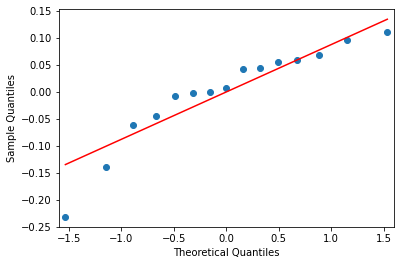

In [30]:
# Visual Normality Test
qqplot(resids2, line='s');

# Jarque-Bera test results are in the summary of Model 1

In [31]:
# The Breusch-Pagan heteroskedasticity test
BPtest = pd.DataFrame(stats.diagnostic.het_breuschpagan(resids2, model2.model.exog), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Pagan test ---')
print(BPtest)


 --- The Breusch-Pagan test ---
                         value
chi^2 test statistic  3.282089
chi^2 test p-value    0.511775
F-test statistic      0.700229
F-test p-value        0.609225


/tmp/ipykernel_25652/3107572302.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


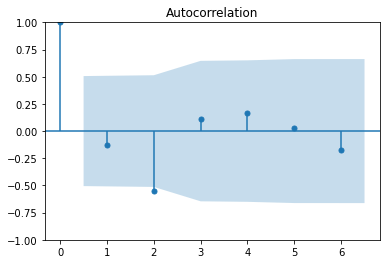

In [32]:
# Graphical Autocorrelation Test
acf = smt.graphics.plot_acf(resids2, lags=6, alpha=0.05)
acf.show()

In [33]:
# The Breusch-Godfrey autocorrelation test
BGtest = pd.DataFrame(stats.diagnostic.acorr_breusch_godfrey(model2, nlags=2), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Godfrey test ---')
print(BGtest)


 --- The Breusch-Godfrey test ---
                         value
chi^2 test statistic  8.373758
chi^2 test p-value    0.015194
F-test statistic      5.054906
F-test p-value        0.038081


### 4.3. Tests of the specification of Model 2

In [34]:
# The RESET test
reset2 = reset_ramsey(model2, degree=3)
print(reset2)

<F test: F=0.2777636302228359, p=0.7644917978511134, df_denom=8, df_num=2>


In [35]:
# Multicollinearity Test
dfXXlog = dfCable.drop(['year', 'Q', 'Inc', 'Hs', 'Un', 'R', 'logQ'], axis=1)

dfVIFslog = pd.DataFrame()
dfVIFslog['regressor'] = dfXXlog.columns
dfVIFslog['VIF'] = np.linalg.inv(dfXXlog.corr().to_numpy()).diagonal().round(2)
dfVIFslog

,regressor,VIF
0,logInc,6.20
1,logHs,6.06
2,logUn,2.15
3,logR,12.29


In [36]:
# Correlation analysis
dfXXlog.corr().round(3)

,logInc,logHs,logUn,logR
logInc,1.000,-0.298,0.709,0.749
logHs,-0.298,1.000,-0.376,-0.793
logUn,0.709,-0.376,1.000,0.620
logR,0.749,-0.793,0.620,1.000


### 4.4. Tests of the coefficients of Model 2

In [ ]:
# Discuss the summary of Model 2:
# * signs and significance of the coefficients
# * overall significance of the model

In [43]:
# linear hypotheses test for group (in)significance
linHypothesis2 = '(logHs = logR), (logR = 0)'
print(model2.f_test(linHypothesis2))

<F test: F=7.4826064623263076, p=0.010311542302772007, df_denom=10, df_num=2>


In [55]:
# linear hypotheses test of price elasticity
linHypothesis3 = '(logR = -1)'
print(model2.f_test(linHypothesis3))

<F test: F=40.603687726675815, p=8.11779964338339e-05, df_denom=10, df_num=1>


In [54]:
# linear hypotheses test of income elasticity
linHypothesis4 = '(logInc = 1)'
print(model2.f_test(linHypothesis4))

<F test: F=3.8376752787930117, p=0.07856672159117147, df_denom=10, df_num=1>


## 5. Optimized logarithmic model

In [37]:
# estimate Model 3
model3 = ols('logQ ~ logInc + logHs + logUn', dfCable).fit()
model3.summary()

/home/ina/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logQ   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     4.684
Date:                Wed, 16 Nov 2022   Prob (F-statistic):             0.0242
Time:                        17:38:49   Log-Likelihood:                 11.453
No. Observations:                  15   AIC:                            -14.91
Df Residuals:                      11   BIC:                            -12.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7160      2.910     -0.246      0.810      -7.121       5.689
logInc         1.0706      0.393      2.721      0.020       0.205       1.936
logHs          0.3612      0.151      2.390      0.036       0.029       0.694
logUn         -0.3743      0.182     -2.052      0.065      -0.776       0.027
==============================================================================
Omnibus:                        0.169   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.128
Skew:                          -0.150   Prob(JB):                        0.938
Kurtosis:                       2.662   Cond. No.                         902.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# compare with Model 3 with Model 2
model2.summary()

/home/ina/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logQ   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     6.856
Date:                Wed, 16 Nov 2022   Prob (F-statistic):            0.00635
Time:                        17:38:54   Log-Likelihood:                 15.177
No. Observations:                  15   AIC:                            -20.35
Df Residuals:                      10   BIC:                            -16.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5000      2.536      0.591      0.567      -4.151       7.151
logInc        -0.1065      0.565     -0.189      0.854      -1.365       1.152
logHs          1.0033      0.282      3.561      0.005       0.375       1.631
logUn         -0.3457      0.150     -2.310      0.043      -0.679      -0.012
logR           0.6611      0.261      2.536      0.030       0.080       1.242
==============================================================================
Omnibus:                        7.603   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                4.321
Skew:                          -1.216   Prob(JB):                        0.115
Kurtosis:                       4.001   Cond. No.                         988.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Predictions

Let's say we know that in 1983 the values of our two variables were the following:

- Pc = 69.3
- Inc = 2567.7

In [51]:
# make a data-frame
dfCable = pd.DataFrame({'Q': [7923.0],
                        'Inc': [1535.4],
                       'Hs' : [1200.0],
                       'Un':[8.8]})
dfCable

,Q,Inc,Hs,Un
0,7923.0,1535.4,1200.0,8.8


In [52]:
# obtain a forecast
print(model1.get_prediction(dfCable, weights=1).summary_frame(alpha=0.05).round(2))

      mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  7230.91   477.97         6178.9        8282.91       5029.49       9432.32


In [53]:
# calculate the exponent of the forecast
np.exp(7230.91).round(3)

/tmp/ipykernel_25652/2253734278.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(7230.91).round(3)


inf